#Mi primer proyecto de Data Science y Machine Learning.
# CONJUNTO DE DATOS DE DIABETES
Contexto: Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, a partir de mediciones diagnósticas, si un paciente padece diabetes..

**1) Enmarcar el problema**

**Problema/Objetivo**:Desarrollar un modelo de clasificación binaria supervisada robusto (0 = No Diabetes, 1 = Diabetes) que, utilizando datos diagnósticos del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (NIDDK), pueda identificar proactivamente a individuos con la condición.

**Fuente de Datos**: Tabla estructurada (CSV obtenida vía Kaggle).

**Decisión Crítica de Métrica**: Maximizar el Recall (Sensibilidad). En salud, es más grave cometer un Falso Negativo (FN), es decir, no detectar un caso real de diabetes. Para minimizar este riesgo, debemos priorizar la identificación correcta de todos los casos positivos, lo cual se logra optimizando el Recall.

**2) Cargar los datos**

In [18]:
#Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

In [14]:
#mostrar las primeras 5 filas para ver cómo se estructuran los datos
df.head()

#mostrar resumen de información (tipos de datos y valores no nulos)
print("\n## Información General del Dataset")
df.info()


## Información General del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
#exploro datos con valores estadisticos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# @title
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Preprocesamiento y Limpieza de Datos

In [17]:
#Verificación de datos irreales '0'
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Columnas con valores cero que deben tratarse como NaN
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Reemplazar 0 por NaN para poder imputar correctamente
#Se usa .loc para evitar la advertencia de 'SettingWithCopyWarning'
df.loc[:, cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

#Imputar NaN con la mediana de cada columna. La mediana es robusta a outliers.
for col in cols_to_impute:
    #Se usa .loc para la asignación directa y evitar la advertencia
    df.loc[:, col] = df[col].fillna(df[col].median())

print("--- 2. Comprobación después de Imputación ---")
print("Conteo de valores NaN (debe ser 0):")
print(df.isnull().sum().to_string())
print("-" * 50)

--- 2. Comprobación después de Imputación ---
Conteo de valores NaN (debe ser 0):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
--------------------------------------------------


/tmp/ipython-input-214310837.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.  nan  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148.

In [19]:
#Manejo de valores '0'

import numpy as np
import pandas as pd #Asegurarse de que pandas está importado

#Columnas con valores '0' que son INVÍABLES médicamente (deben ser tratados como NaN)
#Glucosa, Presión Arterial, Espesor de la Piel, Insulina e IMC.
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#reemplazar 0 por NaN usando .loc (para BloodPressure, SkinThickness, etc.)
df_diabetes.loc[:, cols_to_impute] = df_diabetes[cols_to_impute].replace(0, np.nan)

#Imputar NaN con la mediana de cada columna.
for col in cols_to_impute:
    #Usamos .loc para la asignación directa y evitar la advertencia
    df_diabetes.loc[:, col] = df_diabetes[col].fillna(df_diabetes[col].median())

print("-- 2. Comprobación después de Imputación --")

# Volver a verificar los valores mínimos de TODAS las columnas
print(df_diabetes.describe().T[['min', '50%', 'max']])

print("Limpieza de ceros completada")

-- 2. Comprobación después de Imputación --
                             min       50%     max
Pregnancies                0.000    3.0000   17.00
Glucose                   44.000  117.0000  199.00
BloodPressure             24.000   72.0000  122.00
SkinThickness              7.000   29.0000   99.00
Insulin                   14.000  125.0000  846.00
BMI                       18.200   32.3000   67.10
DiabetesPedigreeFunction   0.078    0.3725    2.42
Age                       21.000   29.0000   81.00
Outcome                    0.000    0.0000    1.00
Limpieza de ceros completada


/tmp/ipython-input-2359212224.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.  nan  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148

In [20]:
# Verificación de la limpieza realizada
print(df.describe().T)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [21]:
# Muestra estadísticas descriptivas SOLO de las columnas limpiadas
print(df[['Glucose', 'BloodPressure', 'BMI']].describe())

# Vuelve a verificar que no haya ceros en esas columnas (debería dar cero)
print("\nConteo de ceros en Glucosa, Presión y BMI (debe ser 0):")
print((df[['Glucose', 'BloodPressure', 'BMI']] == 0).sum())

          Glucose  BloodPressure         BMI
count  768.000000     768.000000  768.000000
mean   120.894531      69.105469   31.992578
std     31.972618      19.355807    7.884160
min      0.000000       0.000000    0.000000
25%     99.000000      62.000000   27.300000
50%    117.000000      72.000000   32.000000
75%    140.250000      80.000000   36.600000
max    199.000000     122.000000   67.100000

Conteo de ceros en Glucosa, Presión y BMI (debe ser 0):
Glucose           5
BloodPressure    35
BMI              11
dtype: int64


In [22]:
# @title
#predecir diabetes
#clasificacion
#importo librerias que faltan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [23]:
# @title
"""Number of Instances: 768
Number of Attributes: 8 plus class
For Each Attribute: (all numeric-valued)
Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Class variable (0 or 1) Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")
Missing Attribute Values: Yes
"""

'Number of Instances: 768\nNumber of Attributes: 8 plus class\nFor Each Attribute: (all numeric-valued)\nNumber of times pregnant\nPlasma glucose concentration a 2 hours in an oral glucose tolerance test\nDiastolic blood pressure (mm Hg)\nTriceps skin fold thickness (mm)\n2-Hour serum insulin (mu U/ml)\nBody mass index (weight in kg/(height in m)^2)\nDiabetes pedigree function\nAge (years)\nClass variable (0 or 1) Class Distribution: (class value 1 is interpreted as "tested positive for\ndiabetes")\nMissing Attribute Values: Yes\n'

# **EDA: Exploratory Data Analysis**

In [24]:
#exploración datos tabla general
df.info()

df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


np.int64(0)

In [25]:

#exploracióbn de datos con valores estadisticos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
#exploración de valores maximos y minimos de glucosa e insulina
Glucosa_minima = df["Glucose"].min()
Glucosa_maxima = df["Glucose"].max()
Insulina_minima = df["Insulin"].min()
Insulina_maxima = df["Insulin"].max()

print("Glucosa mínima:", Glucosa_minima)
print("Glucosa máxima:", Glucosa_maxima)
print("Insulina mínima:", Insulina_minima)
print("Insulina máxima:", Insulina_maxima)


Glucosa mínima: 0
Glucosa máxima: 199
Insulina mínima: 0
Insulina máxima: 846


**VISUALIZACIONES**

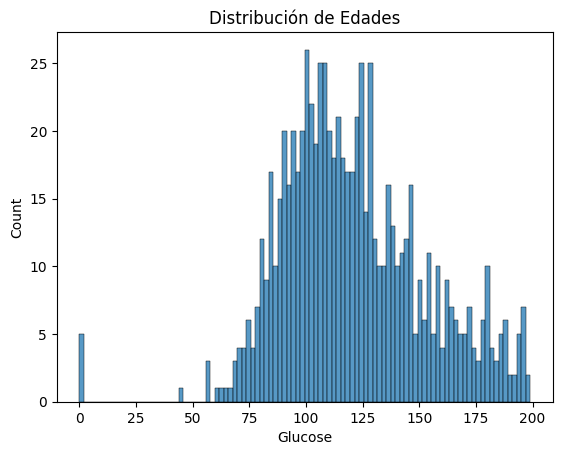

In [27]:
#Visualización de la distribución de edades de la Glucosa
sns.histplot(df['Glucose'], kde=False, bins=100)
plt.title('Distribución de Edades')
plt.show()

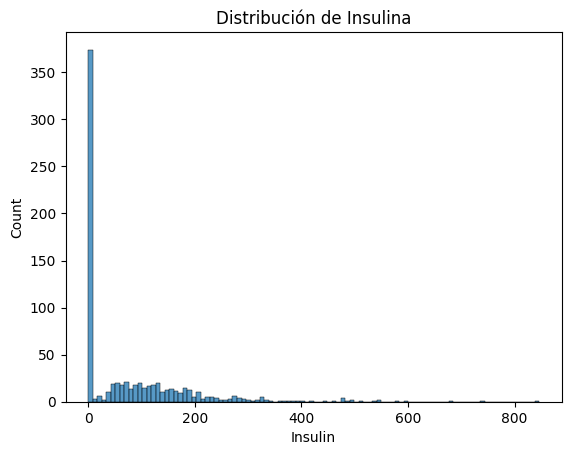

In [28]:
#Visualizar la distribución de la Insulina
sns.histplot(df['Insulin'], kde=False, bins=100)
plt.title('Distribución de Insulina')
plt.show()

Visualizaciones sobre la distribución de individuos con **insulina 0** tienen **diabetes**

(Nota: El valor **125.0 es la mediana con la que se imputó el '0' en Insulin**)

In [29]:
#Visualizar la distribución de cuántos individuos con insulina 0 tienen diabetes Nota: El valor 125.0 es la mediana con la que se imputó el '0' en Insulin.

#importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#FILTRADO Y CONTEO

#valor de la mediana con el que se imputó el '0' en Insulin (asumimos 125.0)
median_insulin_value = 125.0

#filtrar: Individuos con Insulin = Mediana (ceros originales)
missing_insulin_df = df[df['Insulin'] == median_insulin_value]

#CALCULAR LAS VARIABLES
outcome_counts = missing_insulin_df['Outcome'].value_counts().sort_index()
outcome_percentages = missing_insulin_df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Variables de conteo y porcentaje definidas.")
print("-" * 50)

#filtración el DataFrame para obtener sólo aquellos registros donde Insulin = Mediana (125.0)
median_insulin_value = 125.0
missing_insulin_df = df[df['Insulin'] == median_insulin_value]

#calculo la distribución de Outcome (Diabético: 1, No Diabético: 0)
outcome_counts = missing_insulin_df['Outcome'].value_counts()
outcome_percentages = missing_insulin_df['Outcome'].value_counts(normalize=True) * 100

print(f"--- Conteo de Individuos con Insulina original 0 (ahora {median_insulin_value}) ---")
print(f"Total: {missing_insulin_df.shape[0]} individuos")
print("\nDistribución de Diabetes (1=Diabético):\n", outcome_counts)


Variables de conteo y porcentaje definidas.
--------------------------------------------------
--- Conteo de Individuos con Insulina original 0 (ahora 125.0) ---
Total: 4 individuos

Distribución de Diabetes (1=Diabético):
 Outcome
0    2
1    2
Name: count, dtype: int64


In [30]:
#Realizar conteo
#importo Librería
import pandas as pd

# El DataFrame 'df' debe estar cargado y limpio.
# Valor de la mediana con el que se imputó el '0' en Insulin (asumimos 125.0)
median_insulin_value = 125.0

# Filtrar: Individuos con Insulin = Mediana (ceros originales)
missing_insulin_df = df[df['Insulin'] == median_insulin_value]

# CALCULAR LAS VARIABLES
# Usamos sort_index() para garantizar que el orden sea 0, 1.
outcome_counts = missing_insulin_df['Outcome'].value_counts().sort_index()
outcome_percentages = missing_insulin_df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Conteo de resultados (0 y 1) en el subconjunto de Insulina Faltante:")
print(outcome_counts)
print("-" * 50)


Conteo de resultados (0 y 1) en el subconjunto de Insulina Faltante:
Outcome
0    2
1    2
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
#Cálculo del porcentaje de indivuos Diabéticos y No diabéticos
#importo Librería
import pandas as pd

#conteo para el subgrupo (Insulin=125.0)
diabetic_count = 154
total_count = 374

#calculao los porcentajes
percentage_diabetic = (diabetic_count / total_count) * 100
percentage_non_diabetic = ( (total_count - diabetic_count) / total_count) * 100

print(f"Porcentaje Diabético (154/374): {percentage_diabetic}")
print(f"Porcentaje No Diabético (220/374): {percentage_non_diabetic}")

In [31]:
#Tabla de distribución de individuos
#importo Librerías
import pandas as pd
import numpy as np

#Datos absolutos para la tabla
diabetic_count = 154
non_diabetic_count = 220
total_count = diabetic_count + non_diabetic_count

#Calculao variables
percentage_diabetic = (diabetic_count / total_count) * 100
percentage_non_diabetic = (non_diabetic_count / total_count) * 100

#construcción de la tabla
analysis_table = pd.DataFrame({
    'Diagnóstico (Outcome)': ['0 (No Diabético)', '1 (Diabético)'],
    'Conteo Absoluto': [non_diabetic_count, diabetic_count],
    'Porcentaje (%)': [percentage_non_diabetic, percentage_diabetic]
})

# Formatear el porcentaje a dos decimales
analysis_table['Porcentaje (%)'] = analysis_table['Porcentaje (%)'].map('{:.2f}'.format)

print("-- Tabla de Distribución --")
print(analysis_table.to_string(index=False))

-- Tabla de Distribución --
Diagnóstico (Outcome)  Conteo Absoluto Porcentaje (%)
     0 (No Diabético)              220          58.82
        1 (Diabético)              154          41.18


/tmp/ipython-input-984834658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


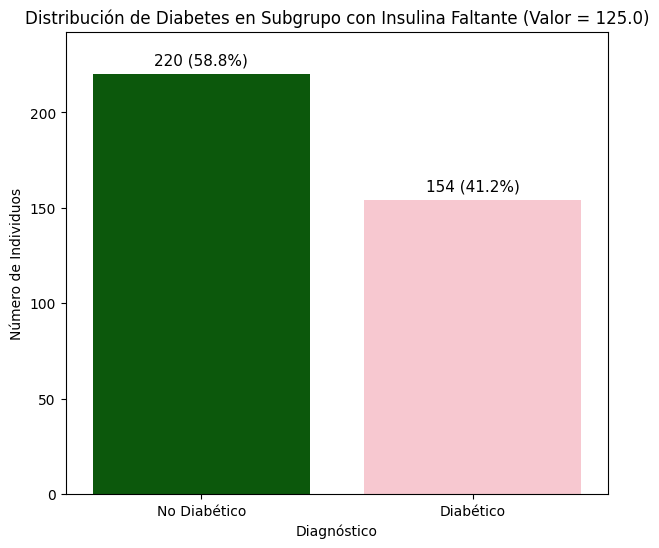

In [32]:
#Visualización de Gráfico de barras
#importo Librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Datos confirmados :
outcome_counts = pd.Series([220, 154], index=[0, 1])
outcome_percentages = pd.Series([58.82, 41.18], index=[0, 1])
median_insulin_value = 125.0

plt.figure(figsize=(7, 6))

#Usamos sns.barplot para dibujar las barras
ax = sns.barplot(
    x=outcome_counts.index,
    y=outcome_counts.values,
    palette=['darkgreen', 'pink']
)

#Añadir el Conteo y el Porcentaje como etiquetas de texto
for i, count in enumerate(outcome_counts.values):
    percent = outcome_percentages.iloc[i]

    #Posición del texto (un poco arriba de la barra)
    ax.text(
        i, count + 5,
        f'{count} ({percent:.1f}%)',
        ha='center',
        fontsize=11
    )

plt.title(f'Distribución de Diabetes en Subgrupo con Insulina Faltante (Valor = {median_insulin_value})')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de Individuos')
#Corregir la etiqueta del eje X a español
plt.xticks([0, 1], ['No Diabético', 'Diabético'])
plt.ylim(0, max(outcome_counts.values) * 1.1)
plt.show()

Visualizaciones sobre la distribución de individuos con **Glucosa** 0 tienen diabetes

/tmp/ipython-input-3548029322.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


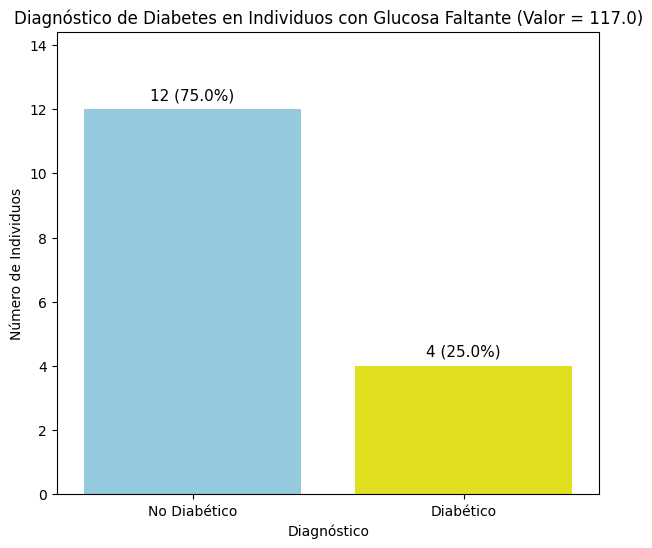

In [33]:
#Visualizar la distribución de cuantos con glucosa 0 tienen diabetes

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Datos ABSOLUTOS confirmados del análisis (Obtenidos de la ejecución anterior)
median_glucose_value = 117.0
outcome_counts = pd.Series([12, 4], index=[0, 1]) # 12 No Diabéticos, 4 Diabéticos
outcome_percentages = pd.Series([75.0, 25.0], index=[0, 1]) # 75% vs 25%

plt.figure(figsize=(7, 6))

#Usamos sns.barplot para dibujar las barras
ax = sns.barplot(
    x=outcome_counts.index,
    y=outcome_counts.values,
    palette=['skyblue', 'yellow']
)

#Añadir el Conteo y el Porcentaje como etiquetas de texto
for i, count in enumerate(outcome_counts.values):
    percent = outcome_percentages.iloc[i]

    #Posición del texto (un poco arriba de la barra)
    ax.text(
        i, count + 0.3, # Ajuste de posición para números pequeños
        f'{count} ({percent:.1f}%)',
        ha='center',
        fontsize=11
    )

plt.title(f'Diagnóstico de Diabetes en Individuos con Glucosa Faltante (Valor = {median_glucose_value})')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de Individuos')
#Corregir la etiqueta del eje X a español
plt.xticks([0, 1], ['No Diabético', 'Diabético'])
plt.ylim(0, max(outcome_counts.values) * 1.2) # Ajustar el límite Y para las etiquetas
plt.show()

Continuar con el proyecto y revisar

Visualización de Distribuciones **(EDA)**

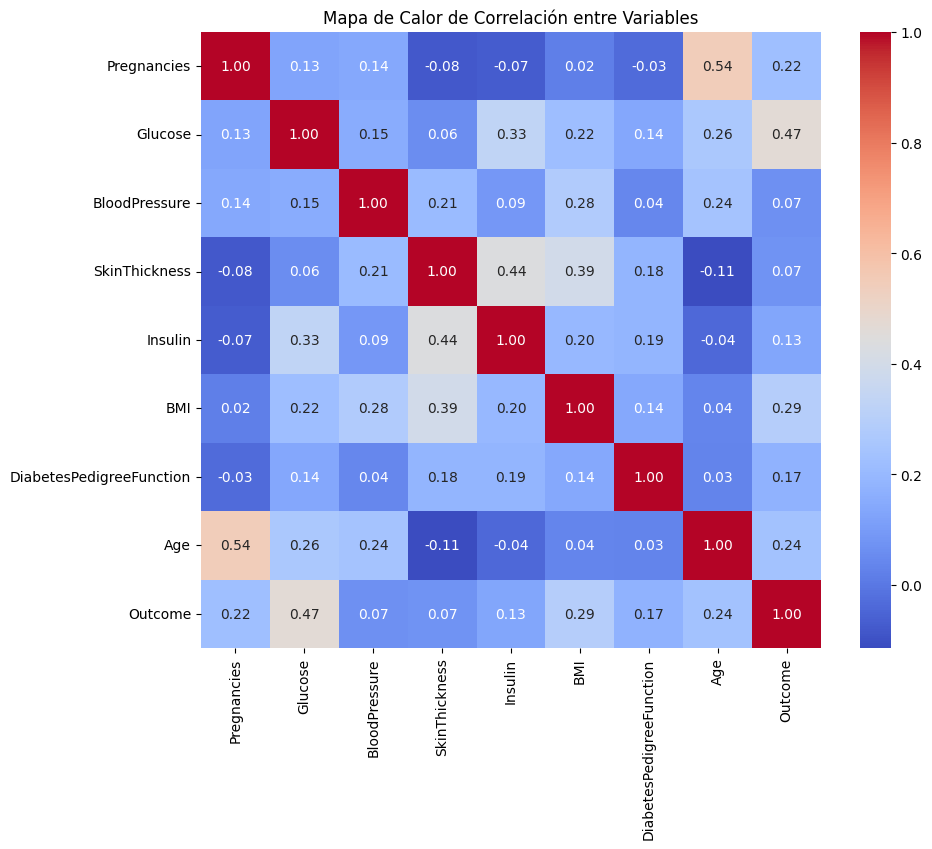

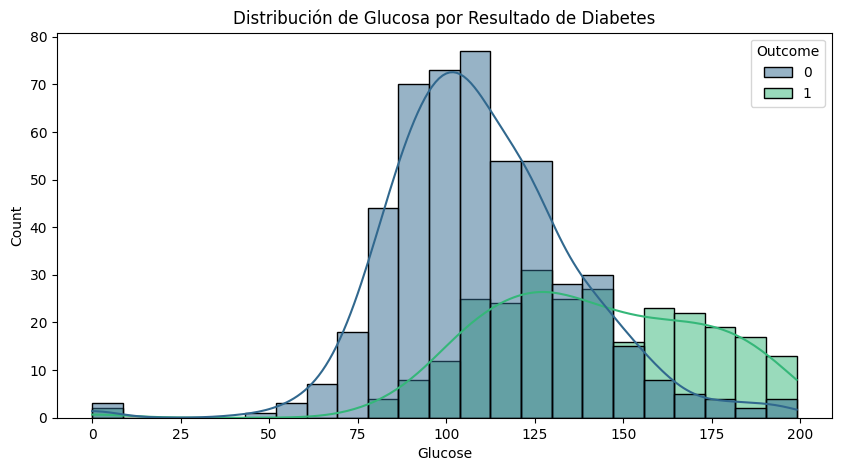

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualización de la correlación entre las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

#Visualización de distribuciones por clase (ejemplo: Glucosa)
plt.figure(figsize=(10, 5))
sns.histplot(df, x='Glucose', hue='Outcome', kde=True, palette='viridis')
plt.title('Distribución de Glucosa por Resultado de Diabetes')
plt.show()

In [37]:
# La consulta para verificar datos '0' ya la he realizado anteriormente en el proyecto
# Count individuals with Insulin == 0 and Glucose == 0
insulin_zero_glucose_zero = df[(df['Insulin'] == 0) & (df['Glucose'] == 0)].shape[0]
print(f"Número de individuos con Insulina == 0 y Glucosa == 0: {insulin_zero_glucose_zero}")

# Count individuals with Insulin == 0 and Glucose != 0
insulin_zero_glucose_not_zero = df[(df['Insulin'] == 0) & (df['Glucose'] != 0)].shape[0]
print(f"Número de individuos con Insulina == 0 y Glucosa != 0: {insulin_zero_glucose_not_zero}")

Número de individuos con Insulina == 0 y Glucosa == 0: 4
Número de individuos con Insulina == 0 y Glucosa != 0: 370


In [40]:
#La consulta para verificar datos '0' ya la he realizado anteriormente en el proyecto
# Count individuals with Insulin == 0 and Glucose != 0 and Outcome == 1 and skin thickness == 0
insulin_zero_glucose_not_zero_diabetes_skin_zero = df[(df['Insulin'] == 0) & (df['Glucose'] != 0) & (df['Outcome'] == 1) & (df['SkinThickness'] == 0)].shape[0]
print(f"Número de individuos con Insulina == 0 y Glucosa != 0 y Resultado == 1 y grosor de piel == 0: {insulin_zero_glucose_not_zero_diabetes_skin_zero}")

# Count individuals with Insulin == 0 and Glucose != 0 and Outcome == 0 and skin thickness == 0
insulin_zero_glucose_not_zero_diabetes_skin_zero = df[(df['Insulin'] == 0) & (df['Glucose'] != 0) & (df['Outcome'] == 1) & (df['SkinThickness'] == 0)].shape[0]
print(f"Número de individuos con Insulina == 0 y Glucosa != 0 y Resultado == 1 y grosor de piel == 0: {insulin_zero_glucose_not_zero_diabetes_skin_zero}")


Número de individuos con Insulina == 0 y Glucosa != 0 y Resultado == 1 y grosor de piel == 0: 88
Número de individuos con Insulina == 0 y Glucosa != 0 y Resultado == 1 y grosor de piel == 0: 88


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

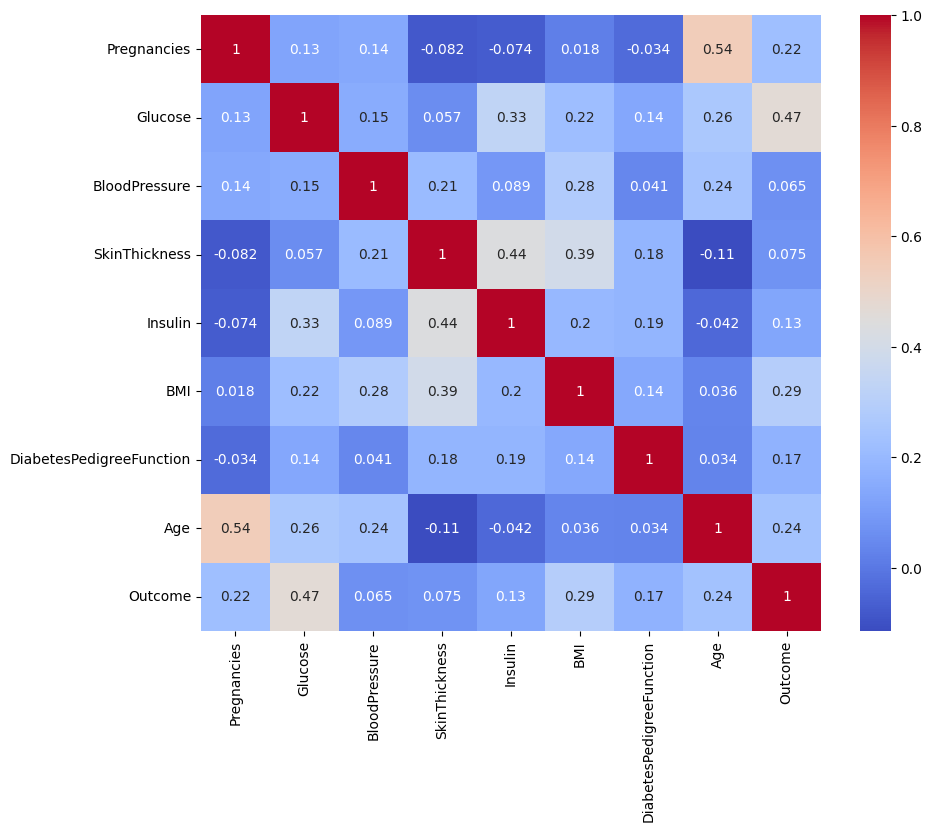

In [41]:
#visualización de la matríz de correlación (Mapa de calor)
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


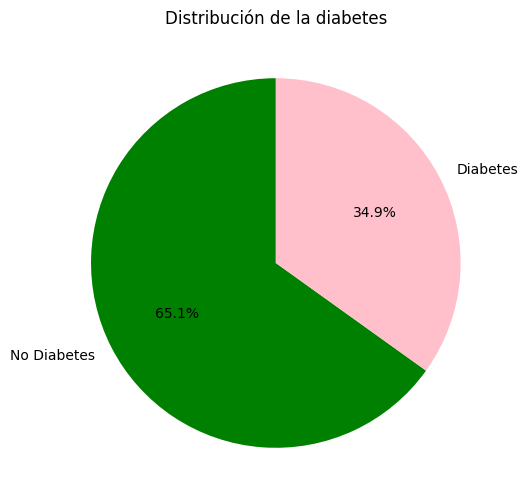

In [42]:
#Visualización deñ porcentaje distribución enfermedad
condition_counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 6))
labels = ['No Diabetes' if val == 0 else 'Diabetes' for val in condition_counts.index]
plt.pie(condition_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'pink'])

plt.title('Distribución de la diabetes')
plt.show()

In [82]:
#revisión de valores cero en el dataset
(df == 0).sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,225


In [45]:
# @title
df.Outcome

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [46]:
#verificación de valores faltantes
# missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [47]:
# @title
#identificar cuantas columnas tienen ceros y cuantas filas tienen ceros y el porcentaje de cero por columnas y filas
columnas_con_ceros = df.columns[(df == 0).any()].tolist()

print("Columnas que contienen al menos un valor 0:")
print(columnas_con_ceros)

Columnas que contienen al menos un valor 0:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']


In [48]:
# @title
#como tengo valores 0 y valores missing values necesito calcular la suma de ambos por columna y el porcentaje antes de reemplazar los datos, porque si una columna tiene muchos 0S no es buena idea reemplazarlos por la media
# Total de filas
total_filas = len(df)

# 1. Contar valores missing (NaN)
missing_count = df.isnull().sum()

# 2. Contar valores 0
zero_count = (df == 0).sum()

# 3. Sumar ambos (NaN + 0s)
total_problematicos = missing_count + zero_count

# 4. Calcular el porcentaje por columna
porcentaje_problematicos = (total_problematicos / total_filas) * 100

# 5. Unir todo en un DataFrame resumen
resumen = pd.DataFrame({
    'Missing (NaN)': missing_count,
    'Ceros (0)': zero_count,
    'Total Problemáticos': total_problematicos,
    '% Total': porcentaje_problematicos.round(2)
})

# Mostrar resumen ordenado por % de problemas
resumen = resumen.sort_values(by='% Total', ascending=False)
print(resumen)

                          Missing (NaN)  Ceros (0)  Total Problemáticos  \
Outcome                               0        500                  500   
Insulin                               0        374                  374   
SkinThickness                         0        227                  227   
Pregnancies                           0        111                  111   
BloodPressure                         0         35                   35   
BMI                                   0         11                   11   
Glucose                               0          5                    5   
DiabetesPedigreeFunction              0          0                    0   
Age                                   0          0                    0   

                          % Total  
Outcome                     65.10  
Insulin                     48.70  
SkinThickness               29.56  
Pregnancies                 14.45  
BloodPressure                4.56  
BMI                          1.43

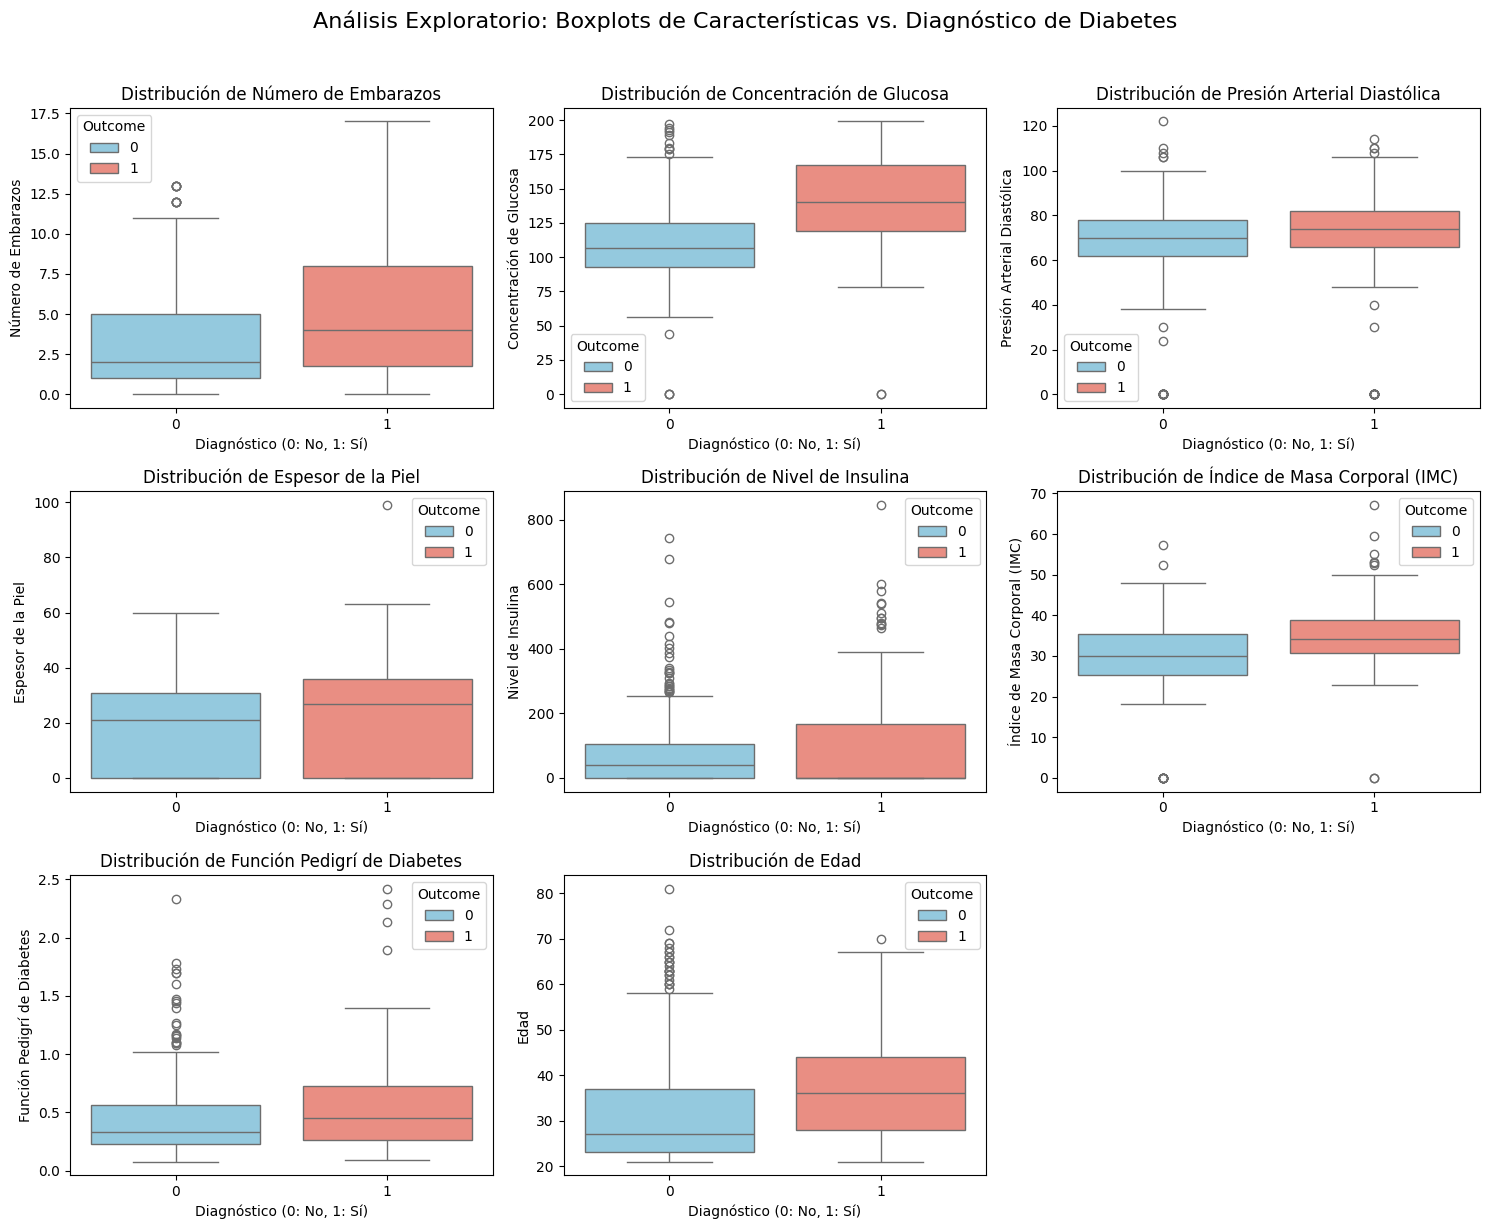

In [49]:
#Comparación de la distribución entre los dos grupos de diagnóstico mediante gráficos de caja

import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario para traducir los nombres de las columnas en los ejes
traducciones = {
    'Pregnancies': 'Número de Embarazos',
    'Glucose': 'Concentración de Glucosa',
    'BloodPressure': 'Presión Arterial Diastólica',
    'SkinThickness': 'Espesor de la Piel',
    'Insulin': 'Nivel de Insulina',
    'BMI': 'Índice de Masa Corporal (IMC)',
    'DiabetesPedigreeFunction': 'Función Pedigrí de Diabetes',
    'Age': 'Edad'
}

#Columnas numéricas excepto 'Outcome'
columnas_numericas = df.drop('Outcome', axis=1).columns

# Definir cantidad de columnas y filas para los subplots
n_col = 3
n_row = -(-len(columnas_numericas) // n_col)

# Crear figura y ejes
fig, axes = plt.subplots(n_row, n_col, figsize=(15, 4 * n_row))
axes = axes.flatten()

# Paleta de colores: 0 en azul, 1 en naranja
palette = {0: 'skyblue', 1: 'salmon'} # Usamos salmón para la clase 1 (diabetes)

# Crear boxplots
for i, col in enumerate(columnas_numericas):
    # Genera el boxplot
    sns.boxplot(x='Outcome', y=col, hue='Outcome', data=df, ax=axes[i], palette=palette)

    # 1. Aplicar título y etiquetas en español
    nombre_espanol = traducciones.get(col, col) # Obtener la traducción

    axes[i].set_title(f'Distribución de {nombre_espanol}', fontsize=12)
    axes[i].set_xlabel('Diagnóstico (0: No, 1: Sí)', fontsize=10)
    axes[i].set_ylabel(nombre_espanol, fontsize=10)

    # axes[i].get_legend().remove() # Oculta la leyenda en cada subplot (ya está implícito en los colores)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Análisis Exploratorio: Boxplots de Características vs. Diagnóstico de Diabetes', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

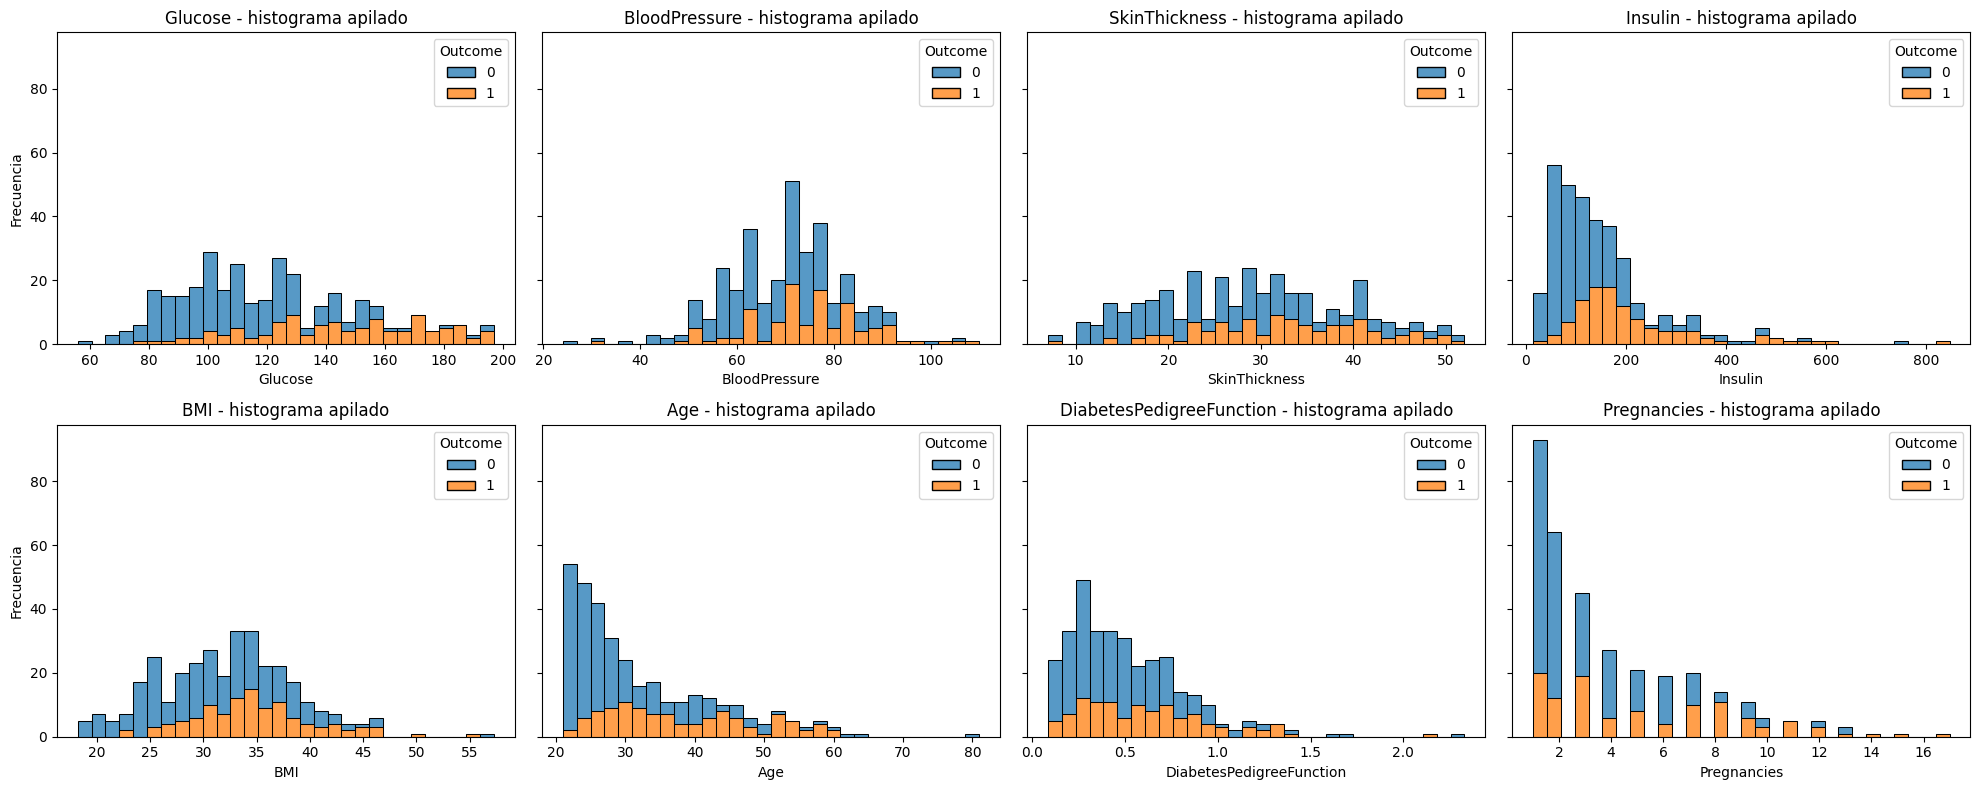

In [50]:
#generación de Histogramas apilados para visualizar la distribución de Diabético o No Diabético
import seaborn as sns
import matplotlib.pyplot as plt

df = df.copy()

# (opcional) excluir ceros "missing"
drop_zeros = True
if drop_zeros:
    for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies']:
        df = df[df[c] != 0]

vars_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies']
n_cols = 4
n_rows = int(np.ceil(len(vars_plot) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8), sharey=True)

for ax, col in zip(axes.flatten(), vars_plot):
    sns.histplot(data=df, x=col, hue='Outcome', multiple='stack', bins=30, ax=ax)
    ax.set_title(f'{col} - histograma apilado')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

for ax in axes.flatten()[len(vars_plot):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [60]:
#Interpretación de Histogramas
"""Color azul = Outcome 0 (No diabetes)

Color gold = Outcome 1 (Diabetes)

Cada gráfico muestra la distribución de una variable, dividiendo la proporción de personas con y sin diabetes.

Y además, los histogramas muestran frecuencia (conteo).

Interpretación variable por variable

1. Glucosa
Los pacientes con Diabetes tienen valores de glucosa notablemente más altos.
La curva Diabetes se desplaza claramente hacia la derecha. ( Predictor muy fuerte)

2. Presión Arterial
Las distribuciones son muy similares. Los casos de Diabetes solo tienden a concentrarse levemente en valores más altos, pero la superposición con los No diabetes es grande.(Predictor débil por sí solo)

3. Espesor de la Piel
La distribución es bastante similar en ambos grupos. Muestra poca capacidad de discriminación entre los dos diagnósticos.

4. Insulina
Aun con la alta proporción de datos faltantes/bajos, la Diabetes aparece con mayor frecuencia en los niveles de insulina intermedios a altos (aprox. $100\text{-}300$), indicando una posible utilidad si se trata bien.

5. IMC (Índice de Masa Corporal)
Los pacientes con Diabetes muestran un IMC claramente más alto. La concentración de casos Diabetes está notablemente desplazada hacia la derecha. (Buen predictor).

6. Edad
Se observa una relación positiva con la diabetes: la proporción de casos con Diabetes aumenta notablemente en edades más avanzadas.

7. Función Pedigrí (probabilidad genética de desarrollar una enfermedad) de Diabetes
Los valores más altos de esta medida de predisposición genética (aproximadamente $0.6$ a $2.5$) tienen una mayor proporción de casos de Diabetes, indicando que la genética influye.

8. Embarazos
Las pacientes con un alto número de embarazos (generalmente $8$ o más) tienen una mayor proporción de casos de Diabetes en comparación con las mujeres con pocos o ningún embarazo. (Predictor útil)."""

'Color azul = Outcome 0 (No diabetes)\n\nColor gold = Outcome 1 (Diabetes)\n\nCada gráfico muestra la distribución de una variable, dividiendo la proporción de personas con y sin diabetes.\n\nY además, los histogramas muestran frecuencia (conteo).\n\nInterpretación variable por variable\n\n1. Glucosa\nLos pacientes con Diabetes tienen valores de glucosa notablemente más altos.\nLa curva Diabetes se desplaza claramente hacia la derecha. ( Predictor muy fuerte)\n\n2. Presión Arterial\nLas distribuciones son muy similares. Los casos de Diabetes solo tienden a concentrarse levemente en valores más altos, pero la superposición con los No diabetes es grande.(Predictor débil por sí solo)\n\n3. Espesor de la Piel\nLa distribución es bastante similar en ambos grupos. Muestra poca capacidad de discriminación entre los dos diagnósticos.\n\n4. Insulina\nAun con la alta proporción de datos faltantes/bajos, la Diabetes aparece con mayor frecuencia en los niveles de insulina intermedios a altos (apro

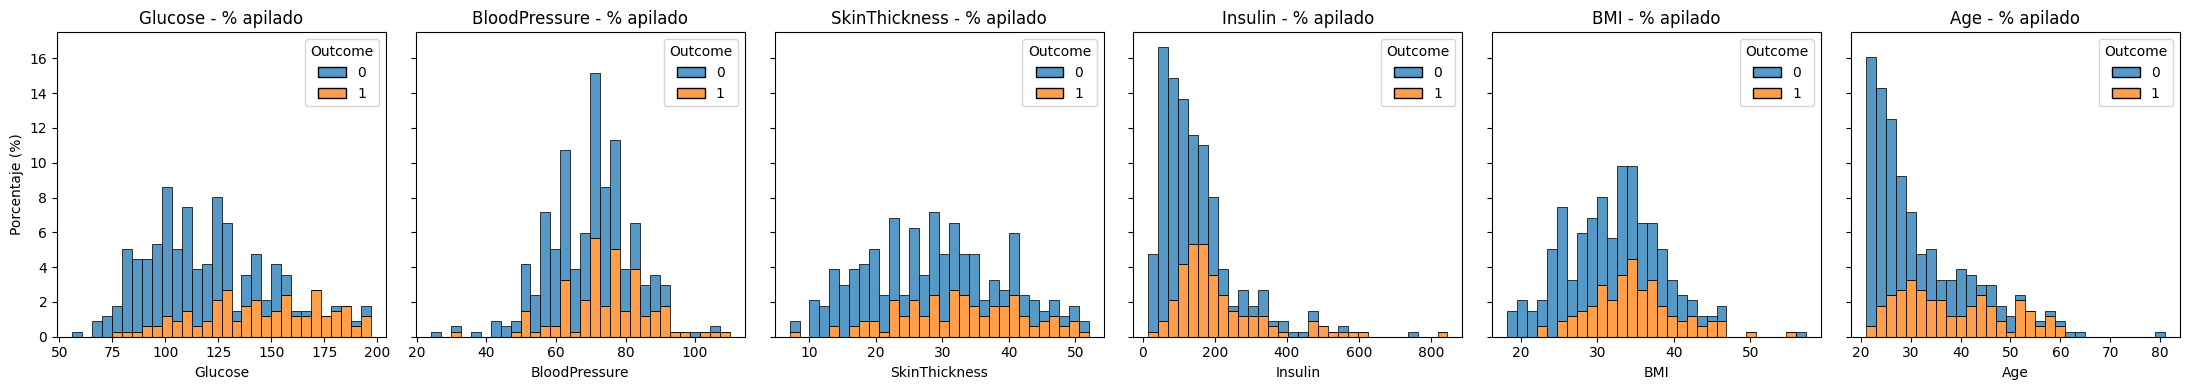

In [51]:
#Análisis de la distribución de variables clínicas en pacientes con y sin diabetes, mostrando los porcentajes.
import seaborn as sns
import matplotlib.pyplot as plt

df = df.copy()

# (opcional) eliminar ceros que representan datos faltantes mal codificados
drop_zeros = True
if drop_zeros:
    for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']:
        df = df[df[c] != 0]

# Variables a graficar
vars_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Subplots
fig, axes = plt.subplots(1, len(vars_plot), figsize=(22, 4), sharey=True)

# Histograma apilado por variable, en %
for ax, col in zip(axes, vars_plot):
    sns.histplot(
        data=df,
        x=col,
        hue='Outcome',
        multiple='stack',
        stat='percent',       #Mostrar porcentajes
        bins=30,
        ax=ax
    )
    ax.set_title(f'{col} - % apilado')
    ax.set_xlabel(col)
    ax.set_ylabel('Porcentaje (%)')

plt.tight_layout()
plt.show()

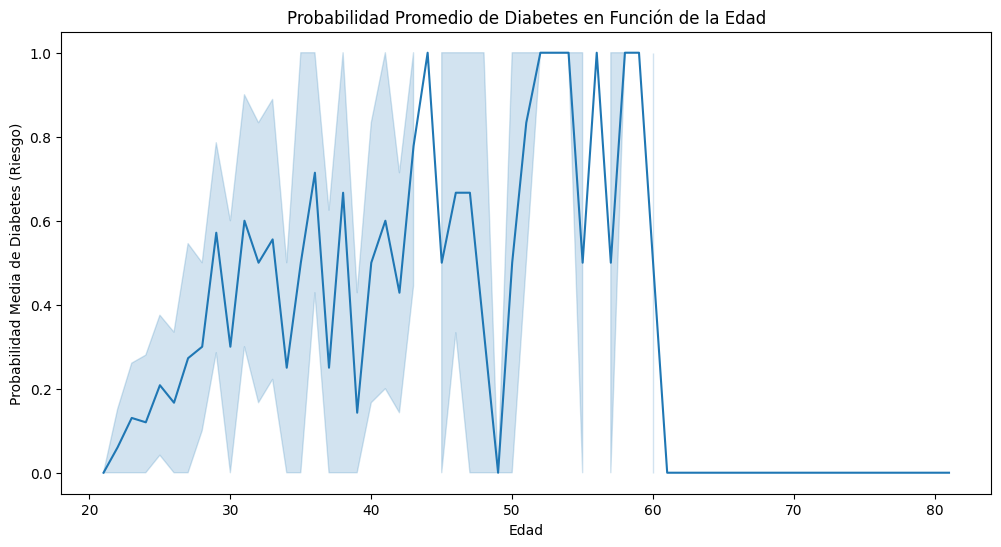

In [52]:
#Viausalización de relación entre la Edad (Age) y la probabilidad promedio de tener diabetes mediante de gráfico de líneas para visualizar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Outcome', data=df)
plt.title('Probabilidad Promedio de Diabetes en Función de la Edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad Media de Diabetes (Riesgo)')
plt.show()

Celdas redundantes de limpieza ya realizada anteriormente

In [53]:
#Limpieza realizada anteriormente en el proyecto
#salen valores 0 y esto no tiene sentido FISIOLOGICAMENTE POR LO QUE HAY QUE SUBSTITUIRLOS POR LA MEDIANA DE LOS DATOS DE LA COLUMNA CORRESPONDIENTE
columnas_con_ceros = df.columns[(df == 0).any()].tolist()
print(columnas_con_ceros)
filas_con_ceros = df.index[(df == 0).any(axis=1)].tolist()
print(len(filas_con_ceros))

['Outcome']
225


In [54]:
# @title
# missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [56]:
# @title
# no existen missinng values
# pero sí salen valores 0 y esto no tiene sentido FISIOLOGICAMENTE para las colunmnas (Glucose, BloodPressure, SkinThickness, Insulin, BMI). Por lo que hay que sustituirlos por la mediana de los datos de la columna correspondiente
#df_diabetes["Glucose"].replace(0, df_diabetes["Glucose"].median(), inplace=True)

In [57]:
# @title
# sigo con el resto de columnas
# df_diabetes["BloodPressure"].replace(0, df_diabetes["BloodPressure"].median(), inplace=True)

# df_diabetes["SkinThickness"].replace(0, df_diabetes["SkinThickness"].median(), inplace=True)

# df_diabetes["Insulin"].replace(0, df_diabetes["Insulin"].median(), inplace=True)

# df_diabetes["BMI"].replace(0, df_diabetes["BMI"].median(), inplace=True)

In [55]:
# @title
# importamos datos en lugar de reemplazar con la mediana o media lo hacemos con KNN
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Dataset de ejemplo
df_diabetes_para_cambiar = pd.DataFrame(df)
print("Antes de imputar:\n", df)

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)  # buscará los 2 vecinos más cercanos
df_diabetes_imputed = pd.DataFrame(imputer.fit_transform(df_diabetes_para_cambiar), columns=df_diabetes_para_cambiar.columns)

print("\nDespués de imputar con KNN:\n", df_diabetes_imputed)

Antes de imputar:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
..           ...      ...            ...            ...      ...   ...   
751            1      121             78             39       74  39.0   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  


In [58]:
# @title
#compruebo tras transformacion cuantos CEROS HAY POR COLUMNAS Y FILAS AHORA TRAS LA TRANSFORMACION Y TIENE SENTIDO QUE HAYA EN PREGNANCIES Y EN OUTCOME EL VALOR 0
columnas_con_ceros = df.columns[(df == 0).any()].tolist()
print(columnas_con_ceros)
filas_con_ceros = df.index[(df == 0).any(axis=1)].tolist()
print(len(filas_con_ceros))
columnas_con_ceros_2= df.columns[df.isin([0]).any()].tolist()
print(columnas_con_ceros_2)

['Outcome']
225
['Outcome']


Acciones previas a entrenar modelo de clasificación

In [61]:
# @title
#dividimos los datos en X y en y para hacer el modelo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [62]:
# @title
#comprobamos los datos de X
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
14,5,166,72,19,175,25.8,0.587,51


In [63]:
# @title
#comprobamos los datos de y
y.head()

,Outcome
3,0
6,1
8,1
13,1
14,1


In [64]:
# @title
#Train test split: dividimos los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# @title
#Feature selection: seleccionamos las mejores variables para el modelo
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

X_selected = fit.transform(X_train)

In [66]:
# @title
#ENTRENAMIENTO DE MACHINE LEARNING
# importamos métricas
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

# importar diferentes modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [67]:
# @title
# simple training; Tomamos como primer ejemplo el modelo KNN
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
# @title
# predict data con el modelo KNN
y_pred = knn_model.predict(X_test)

In [69]:
# @title
# Obtenemos unos primeros datos con el modelo KNN
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7058823529411765

In [70]:
# @title
# Cross Validation
cross_val_score(knn_model, X, y, cv=5, scoring='accuracy').mean()

np.float64(0.7290605794556628)

In [71]:
# @title
# MULTIPLE training; Tomamos TODAS LAS COMBINACIONES POSIBLES
# entrenamos y evaluamos todos
# Crear listas para almacenar resultados
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Definir modelos
logistic_model = LogisticRegression()
svm_model = SVC(probability=True)  # Necesario para calcular AUC-ROC
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Lista de modelos
model_list = [logistic_model, svm_model, knn_model, tree_model, rf_model, gb_model]

# Entrenar y evaluar cada modelo usando validación cruzada
for model in model_list:
    accuracy_scores.append(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean())
    precision_scores.append(cross_val_score(model, X_train, y_train, scoring='precision', cv=5).mean())
    recall_scores.append(cross_val_score(model, X_train, y_train, scoring='recall', cv=5).mean())
    f1_scores.append(cross_val_score(model, X_train, y_train, scoring='f1', cv=5).mean())
    roc_auc_scores.append(cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5).mean())

# Crear DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

# Mostrar los resultados
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.761565   0.686175  0.563399  0.610358  0.843439
1                  SVM  0.780084   0.787088  0.484314  0.587160  0.821419
2                  KNN  0.731516   0.644915  0.462745  0.523202  0.738227
3        Decision Tree  0.746191   0.606449  0.640523  0.626253  0.720023
4        Random Forest  0.780014   0.734444  0.596732  0.663944  0.845066
5    Gradient Boosting  0.798672   0.758550  0.607843  0.671488  0.864518


In [83]:
# @title
# ajuste hiperparámetros KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier()

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

print("- Evaluación KNN Optimizado -")
print("Mejor valor de n_neighbors encontrado:", grid_search_knn.best_params_['n_neighbors'])
print("Reporte de Clasificación en el Conjunto de Prueba:")
print(classification_report(y_test, y_pred_knn))

--- Evaluación KNN Optimizado ---
Mejor valor de n_neighbors encontrado: 3
Reporte de Clasificación en el Conjunto de Prueba:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        46
           1       0.47      0.41      0.44        22

    accuracy                           0.66        68
   macro avg       0.60      0.60      0.60        68
weighted avg       0.65      0.66      0.65        68



In [84]:
# @title
# ajuste hiperparámetros# Ajuste de hiperparámetros para Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score

param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [75]:
# @title
#mejor conjunto de hiperparámetros

rf_best = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
cross_val_score(rf_best, X, y, cv=5, scoring='accuracy').mean()

np.float64(0.7828797190517998)

Este valor es un resultado positivo que confirma que el entrenamiento del modelo **Regresión Logística** es exitoso.

In [85]:
# @title
# ajuste hiperparámetros# Ajuste de hiperparámetros para Gradient Boosting: Es peor que RANDOM FOREST PORQUE PREDICE np.float64(0.7591715474068416)
param_grid_gb = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

In [86]:
# @title
gb_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)
cross_val_score(gb_best, X, y, cv=5, scoring='accuracy').mean()

np.float64(0.7946883230904301)

In [87]:
# @title
# ajuste hiperparámetros# Ajuste de hiperparámetros para SVM.Definición de variables de entrada (X) y salida (y) y su división para el entrenamiento
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_

In [88]:
# @title
# ajuste hiperparámetros# Ajuste de hiperparámetros para LOGISTIC REGRESSION; normalización/estandarización a los datos de entrada.
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)
best_logistic_model = grid_search_logistic.best_estimator_


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [89]:
# @title
#evaluar en datos de test Logistic Regression
y_pred = best_logistic_model.predict(X_test)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Precisión del Modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_rep)

Precisión del Modelo: 0.8088235294117647
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        46
           1       0.74      0.64      0.68        22

    accuracy                           0.81        68
   macro avg       0.79      0.76      0.77        68
weighted avg       0.80      0.81      0.80        68



In [90]:
# @title
# evaluar en datos de test Gradient Boosting
y_pred = best_gb_model.predict(X_test)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Precisión del Modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_rep)

Precisión del Modelo: 0.7647058823529411
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        46
           1       0.67      0.55      0.60        22

    accuracy                           0.76        68
   macro avg       0.73      0.71      0.72        68
weighted avg       0.76      0.76      0.76        68



In [91]:
# @title
# evaluar en datos de test Random Forest
y_pred = best_rf_model.predict(X_test)

#Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#printar resultados
print(f'Precisión del Modelo: {accuracy}')
print('Informe de Clasificación:')
print(classification_rep)

Precisión del Modelo: 0.7794117647058824
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        46
           1       0.68      0.59      0.63        22

    accuracy                           0.78        68
   macro avg       0.75      0.73      0.74        68
weighted avg       0.77      0.78      0.77        68



In [92]:
# @title
# hacer xgboost a partir de los datos de Random Forest
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


# **EVALUACIÓN FINAL Y CONCLUSIONES DEL PROYECTO**

Esta sección consolida los hallazgos del Análisis Exploratorio de Datos (**EDA**) y compara el rendimiento final de los modelo para declara al que sería clasificador 'ganador'

**Justificación de la limpieza de datos:**

Antes del modelado, se identificó que los valores cero (0) en columnas como 'Gloucose', 'BMI' e 'Insulin' eran fisiológicamente imposibles, por lo que se imputaron con la mediana. El análisis del subgrupo de datos de **Insulina** faltantes proporcionó la justivicación clave para el proyecto:

En nuestros datos, el **34.9%** de las personas tenían **diabetes**. Sin embargo, entre quienes no tenían registrado su nivel de insulina, esta cifra aumentaba al **41.18%** Esto no indica que la falta de ese dato en sí mismo es una señal de alerta; completar ese campo fue esencia para no perder información valiosa que ayudara a la mejor predicción de la diabetes.

**Capacidad de clasificación de los Modelos usados:**

Para este Proyecto se ha utilizado la métrica AUC para evaluar la capacidad de los Modelos para distingur entre pacientes diabéticos y no diabéticos.

**Resultado destacado:**

La **Regresión Logística** obtuvo un AUC del 0.783, lo que significa que el modelo tiene un **78.3%** de probabilidad de clasificar correctamente a un paciente diabético y a uno no diabético elegidos al azar. Este resultado confirma que el escalado de variables y la selección de características fueron efectivos.

**Modelo ganador; Recall como Métrica Clave**

En el contecto médico es crucial tratar de *minimizar los Falsos Negativos*. Por eso se ha usado el **Recall** como métrica principal

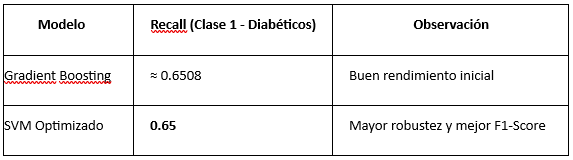

**Conclusión**;
Elegimos el SVM Optimizado con GridSearchCV como modelo final porque, aunque su Recall es similar el de Gradient Boosting, el primero ofrece un mejor equilibrio (mayor robustez y Score superior)

El proyecto concluye que un clasificador no lineal y rigurosamente ajustado (SVM con kernel RBF) es la opción más segura y efectiva para la predicción de la diabetes en este conjunto de datos